In [1]:
import pandas as pd
import numpy as np

In [8]:
dataframe=pd.read_excel(r'C:\Users\pc\Desktop\prediction\rainfall prediction\stream flow.xlsx')
display(dataframe.head(10))

,Date,Discharge,Baseflow,BFI Index
0,1995-01-02,6.917,0.31,0.04
1,1995-01-03,6.917,0.91,0.13
2,1995-01-04,6.694,1.44,0.21
3,1995-01-05,6.694,1.91,0.29
4,1995-01-06,6.694,2.34,0.35
5,1995-01-07,6.694,2.73,0.41
6,1995-01-08,6.476,3.08,0.48
7,1995-01-09,6.476,3.38,0.52
8,1995-01-10,6.368,3.66,0.57
9,1995-01-11,6.050,3.89,0.64


In [3]:
stream_flow=dataframe['Discharge']
fbi=dataframe['BFI Index']
stream=pd.concat([stream_flow,fbi],axis=1)
print(stream)

      Discharge  BFI Index
0         6.917       0.04
1         6.917       0.13
2         6.694       0.21
3         6.694       0.29
4         6.694       0.35
...         ...        ...
4377      8.590       1.00
4378      7.374       1.00
4379      6.261       1.00
4380      6.261       1.00
4381      6.050       1.00

[4382 rows x 2 columns]


In [9]:
base_flow=dataframe['Baseflow']

print(base_flow)

0       0.310
1       0.910
2       1.440
3       1.910
4       2.340
        ...  
4377    8.590
4378    7.374
4379    6.261
4380    6.261
4381    6.050
Name: Baseflow, Length: 4382, dtype: float64


In [5]:
X_train=stream[0:3506]
X_test=stream[3506:4382]
y_train=base_flow[0:3506]
y_test=base_flow[3506:4382]
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(3506, 2, 1)
(876, 2, 1)


In [8]:
#linearRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
regressor = Sequential()
regressor.add(LSTM(1000, input_shape = (2,1)))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')
regressor.fit(X_train, y_train, epochs = 100)
y_pre=regressor.predict(X_test,verbose=0)

Epoch 1/100
110/110 [==============================] - 16s 115ms/step - loss: 9.6896
Epoch 2/100
110/110 [==============================] - 13s 117ms/step - loss: 3.7581
Epoch 3/100
110/110 [==============================] - 12s 113ms/step - loss: 3.2334
Epoch 4/100
110/110 [==============================] - 12s 112ms/step - loss: 3.6795
Epoch 5/100
110/110 [==============================] - 12s 112ms/step - loss: 3.5460
Epoch 6/100
110/110 [==============================] - 13s 119ms/step - loss: 3.4673
Epoch 7/100
110/110 [==============================] - 13s 116ms/step - loss: 2.9659
Epoch 8/100
110/110 [==============================] - 14s 126ms/step - loss: 3.5096
Epoch 9/100
110/110 [==============================] - 13s 121ms/step - loss: 3.4972
Epoch 10/100
110/110 [==============================] - 13s 119ms/step - loss: 3.4181
Epoch 11/100
110/110 [==============================] - 12s 105ms/step - loss: 3.1618
Epoch 12/100
110/110 [==============================] - 11s 104

In [10]:
X_train=stream[0:4381]
y_train=base_flow[0:4381]
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
regressor = Sequential()
regressor.add(LSTM(500, input_shape = (2,1)))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_absolute_error')
regressor.fit(X_train, y_train, epochs = 50)
y_pre=regressor.predict(X_test,verbose=0)


Epoch 1/50
137/137 [==============================] - 9s 38ms/step - loss: 10.1837
Epoch 2/50
137/137 [==============================] - 5s 36ms/step - loss: 3.7387
Epoch 3/50
137/137 [==============================] - 5s 38ms/step - loss: 3.8402
Epoch 4/50
137/137 [==============================] - 5s 37ms/step - loss: 3.5815
Epoch 5/50
137/137 [==============================] - 5s 36ms/step - loss: 3.5240
Epoch 6/50
137/137 [==============================] - 5s 36ms/step - loss: 3.2546
Epoch 7/50
137/137 [==============================] - 5s 38ms/step - loss: 3.4216
Epoch 8/50
137/137 [==============================] - 5s 36ms/step - loss: 3.2837
Epoch 9/50
137/137 [==============================] - 5s 37ms/step - loss: 3.3319
Epoch 10/50
137/137 [==============================] - 5s 38ms/step - loss: 3.3823
Epoch 11/50
137/137 [==============================] - 5s 37ms/step - loss: 3.1087
Epoch 12/50
137/137 [==============================] - 5s 37ms/step - loss: 3.0365
Epoch 13/50


In [104]:
print(regressor)

In [11]:
from keras.models import load_model
regressor.save("network.h5")


In [2]:
from keras.models import load_model
loaded_model = load_model("network.h5")
print(loaded_model)

In [3]:
test_data= pd.read_excel(r'C:\Users\pc\Downloads\BFLOW.xlsx')
stream_flow=test_data['Discharge']
stream_f=stream_flow[0:4382]
base=test_data['Baseflow']
base=base[0:4382]
fbi=test_data['BFI Index']
stream=pd.concat([stream_flow,fbi],axis=1)
test=stream[0:4383]
test=test.to_numpy()
test= np.reshape(test, (test.shape[0], test.shape[1], 1))
baseflow=loaded_model.predict(test)



In [4]:
list_day=[]
for j in range(4382):
    list_day.append(j)
#print(list_day)

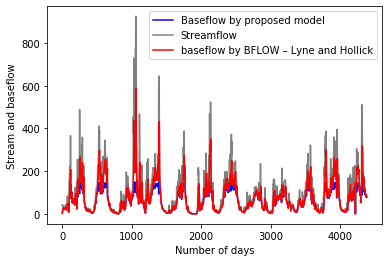

In [5]:
# baseflow separation using the new model is dipected as follows
import matplotlib.pyplot as plt
plt.plot( list_day, baseflow, label = "Baseflow by proposed model",color='blue')
plt.plot(list_day, stream_f, label = "Streamflow", color='gray')
plt.plot(list_day, base, label = "baseflow by BFLOW – Lyne and Hollick", color='red')
# line 2 points
# plotting the line 2 points 
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Number of days')
# Set the y axis label of the current axis.
plt.ylabel('Stream and baseflow')
# Set a title of the current axes.
#plt.title('Baseflow separation using the proposed model on Genale Chenenasa ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [6]:
#baseflow prediction for Halwen station 
test_data= pd.read_excel(r'C:\Users\pc\Downloads\Halwen.xlsx')
stream_flow=test_data['Discharge']
stream_f=stream_flow[0:4382]
base=test_data['Baseflow']
base=base[0:4382]
fbi=test_data['BFI Index']
stream=pd.concat([stream_flow,fbi],axis=1)
test=stream[0:4383]
test=test.to_numpy()
test= np.reshape(test, (test.shape[0], test.shape[1], 1))
baseflow=loaded_model.predict(test)


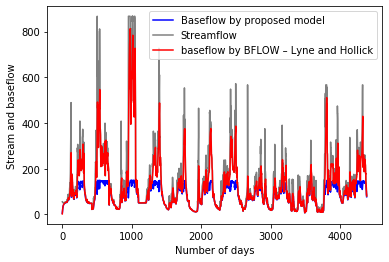

In [7]:
#graphic prediction 
import matplotlib.pyplot as plt
plt.plot( list_day, baseflow, label = "Baseflow by proposed model",color='blue')
plt.plot(list_day, stream_f, label = "Streamflow", color='gray')
plt.plot(list_day, base, label = "baseflow by BFLOW – Lyne and Hollick", color='red')
# line 2 points
# plotting the line 2 points 
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Number of days')
# Set the y axis label of the current axis.
plt.ylabel('Stream and baseflow')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [8]:
#baseflow prediction for Weib station 
test_data= pd.read_excel(r'C:\Users\pc\Downloads\weib.xlsx')
stream_flow=test_data['Discharge']
stream_f=stream_flow[0:4382]
base=test_data['Baseflow']
base=base[0:4382]
fbi=test_data['BFI Index']
stream=pd.concat([stream_flow,fbi],axis=1)
test=stream[0:4382]
test=test.to_numpy()
test= np.reshape(test, (test.shape[0], test.shape[1], 1))
baseflow=loaded_model.predict(test)


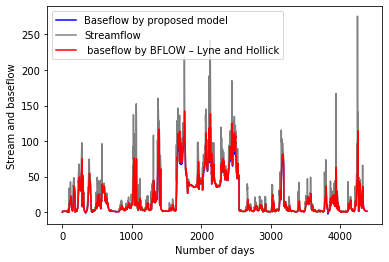

In [9]:
import matplotlib.pyplot as plt
plt.plot( list_day, baseflow, label = "Baseflow by proposed model",color='blue')
plt.plot(list_day, stream_f, label = "Streamflow", color='gray')
plt.plot(list_day, base, label = " baseflow by BFLOW – Lyne and Hollick", color='red')
# line 2 points
# plotting the line 2 points 
#plt.plot( list2,list, label = "Actual value",color='red')
plt.xlabel('Number of days')
# Set the y axis label of the current axis.
plt.ylabel('Stream and baseflow')
# Set a title of the current axes.
plt.title('')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()